**Exercise 1: Implementing a Box Filter**
Write a program to apply a 3x3 box filter (simple averaging filter) on an image.

Use OpenCV to load an image and then apply a box filter to blur the image. Students should implement both manual convolution using a 3x3 kernel and use cv2.blur() to verify the results.
Then use the filter with different kernel sizes (e.g., 5x5, 7x7) and observe the effects.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('house.tiff')


box_kernel_3x3 = np.array([[1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9],
                           [1/9, 1/9, 1/9]])

box_kernel_5x5 = np.array([[1/25, 1/25, 1/25, 1/25, 1/25],
                           [1/25, 1/25, 1/25, 1/25, 1/25],
                           [1/25, 1/25, 1/25, 1/25, 1/25],
                           [1/25, 1/25, 1/25, 1/25, 1/25],
                           [1/25, 1/25, 1/25, 1/25, 1/25]])


box_kernel_7x7 = np.array([[1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49],
                           [1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49],
                           [1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49],
                           [1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49],
                           [1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49],
                           [1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49],
                           [1/49, 1/49, 1/49, 1/49, 1/49, 1/49, 1/49]])


def apply_box_filter(image, kernel):
    output = np.zeros(image.shape)
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), 'edge')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                output[i, j, k] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width, k] * kernel)
    return output

manual_box_filtered_3x3 = apply_box_filter(image, box_kernel_3x3)


cv_box_filtered_3x3 = cv2.blur(image, (3, 3))


cv_box_filtered_5x5 = cv2.blur(image, (5, 5))


cv_box_filtered_7x7 = cv2.blur(image, (7, 7))


fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax[0, 0].imshow(cv2.cvtColor(manual_box_filtered_3x3, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title("Manual 3x3 Box Filter")
ax[0, 0].axis('off')

ax[0, 1].imshow(cv2.cvtColor(cv_box_filtered_3x3, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title("cv2.blur() 3x3 Box Filter")
ax[0, 1].axis('off')

ax[1, 0].imshow(cv2.cvtColor(cv_box_filtered_5x5, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title("cv2.blur() 5x5 Box Filter")
ax[1, 0].axis('off')

ax[1, 1].imshow(cv2.cvtColor(cv_box_filtered_7x7, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title("cv2.blur() 7x7 Box Filter")
ax[1, 1].axis('off')

plt.show()

**Exercise 2: Applying a Gaussian Filter for Noise Reduction**
Use OpenCV to apply a Gaussian filter to reduce Gaussian noise in an image.

Start with an image that has Gaussian noise added using cv2.randn(). Then, apply cv2.GaussianBlur() to reduce the noise. Compare the results of different kernel sizes (e.g., 3x3, 7x7) and sigma values.


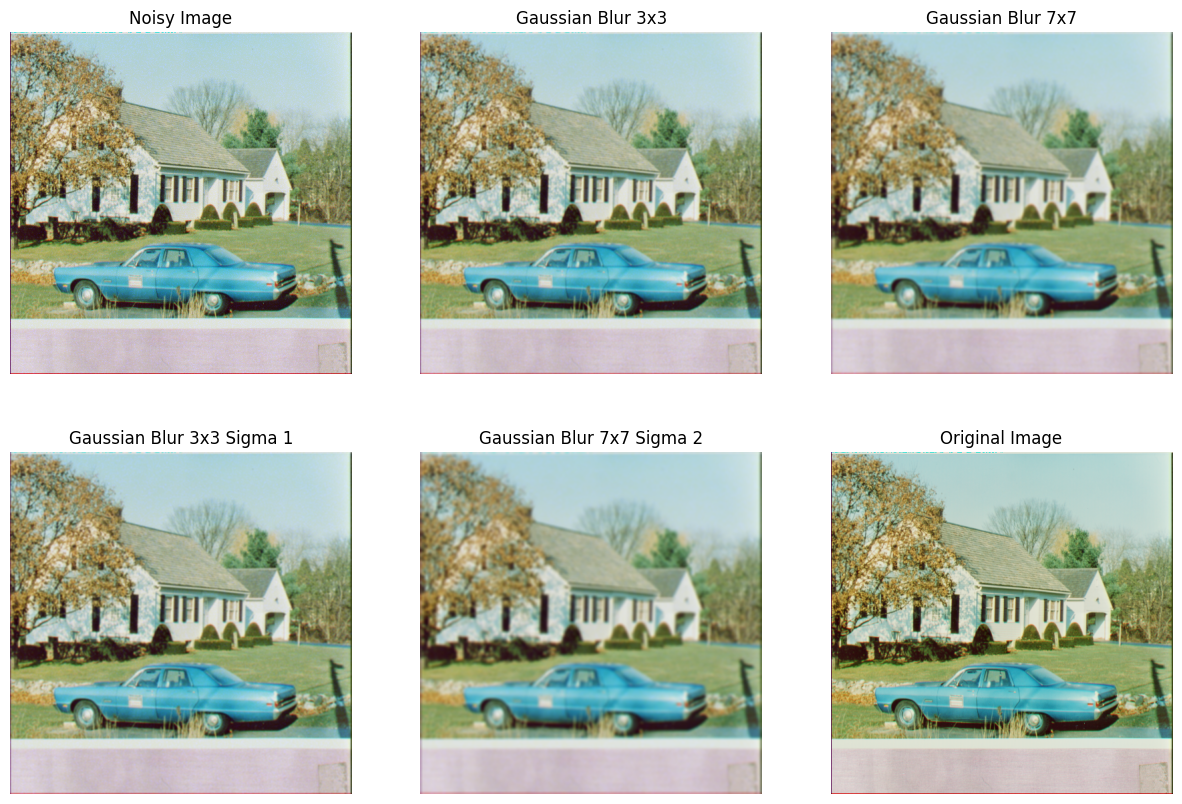

In [5]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('house.tiff')

noise = np.zeros(image.shape, dtype=np.uint8)
cv2.randn(noise, 0, 25)
noisy_image = cv2.add(image, noise)


gaussian_blur_3x3 = cv2.GaussianBlur(noisy_image, (3, 3), 0)
gaussian_blur_7x7 = cv2.GaussianBlur(noisy_image, (7, 7), 0)
gaussian_blur_3x3_sigma1 = cv2.GaussianBlur(noisy_image, (3, 3), 1)
gaussian_blur_7x7_sigma2 = cv2.GaussianBlur(noisy_image, (7, 7), 2)

fig, ax = plt.subplots(2, 3, figsize=(15, 10))

ax[0, 0].imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title("Noisy Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(cv2.cvtColor(gaussian_blur_3x3, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title("Gaussian Blur 3x3")
ax[0, 1].axis('off')

ax[0, 2].imshow(cv2.cvtColor(gaussian_blur_7x7, cv2.COLOR_BGR2RGB))
ax[0, 2].set_title("Gaussian Blur 7x7")
ax[0, 2].axis('off')

ax[1, 0].imshow(cv2.cvtColor(gaussian_blur_3x3_sigma1, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title("Gaussian Blur 3x3 Sigma 1")
ax[1, 0].axis('off')

ax[1, 1].imshow(cv2.cvtColor(gaussian_blur_7x7_sigma2, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title("Gaussian Blur 7x7 Sigma 2")
ax[1, 1].axis('off')

ax[1, 2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[1, 2].set_title("Original Image")
ax[1, 2].axis('off')

plt.show()


**Exercise 3: Median Filtering for Salt-and-Pepper Noise**
Goal: Write a program to remove salt-and-pepper noise using a median filter.
Guideline: Use OpenCV to add salt-and-pepper noise to an image. Then, apply cv2.medianBlur() with different kernel sizes (e.g., 3x3, 5x5) and analyze how effectively the noise is removed without blurring important image details.


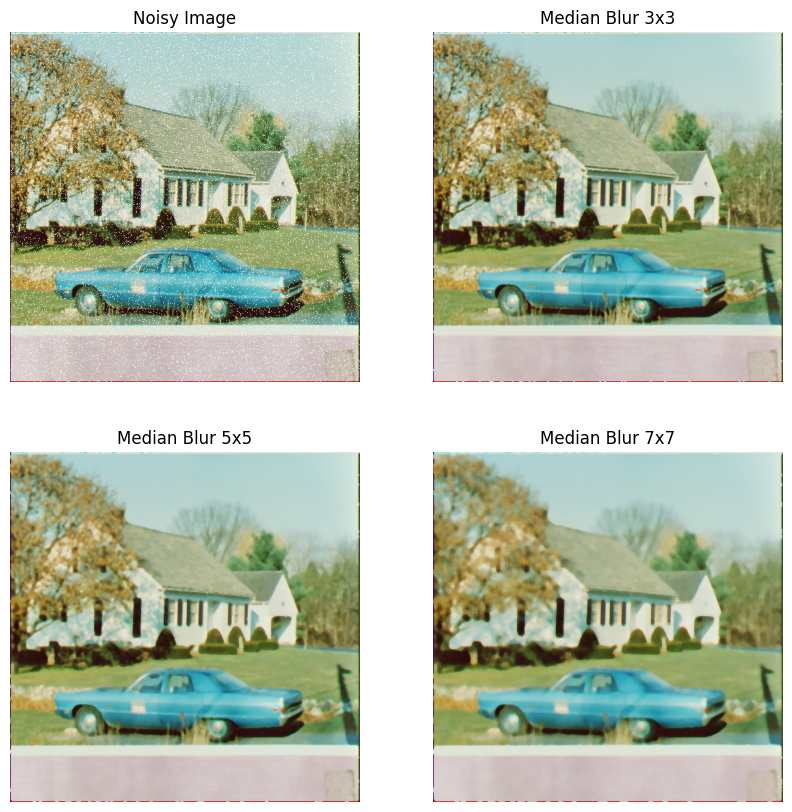

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('house.tiff')


noise = np.zeros(image.shape, dtype=np.uint8)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if np.random.uniform(0, 1) < 0.05:
            noise[i, j] = 255
        elif np.random.uniform(0, 1) < 0.05:
            noise[i, j] = 0
noisy_image = cv2.add(image, noise)

median_blur_3x3 = cv2.medianBlur(noisy_image, 3)
median_blur_5x5 = cv2.medianBlur(noisy_image, 5)
median_blur_7x7 = cv2.medianBlur(noisy_image, 7)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title("Noisy Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(cv2.cvtColor(median_blur_3x3, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title("Median Blur 3x3")
ax[0, 1].axis('off')

ax[1, 0].imshow(cv2.cvtColor(median_blur_5x5, cv2.COLOR_BGR2RGB))
ax[1, 0].set_title("Median Blur 5x5")
ax[1, 0].axis('off')

ax[1, 1].imshow(cv2.cvtColor(median_blur_7x7, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title("Median Blur 7x7")
ax[1, 1].axis('off')

plt.show()



**Exercise 10: Applying Different Noise Types and Evaluating Filters**
Add different types of noise (Gaussian noise, salt-and-pepper noise) and test multiple filters to evaluate their effectiveness in noise reduction.
Use OpenCV to:
Add Gaussian noise: np.random.normal()
Add Salt-and-pepper noise: Randomly assign 0 or 255 to pixels.

Then, apply median filtering, Gaussian filtering, and box filtering to the noisy image. Compare which filter is best for each noise type.

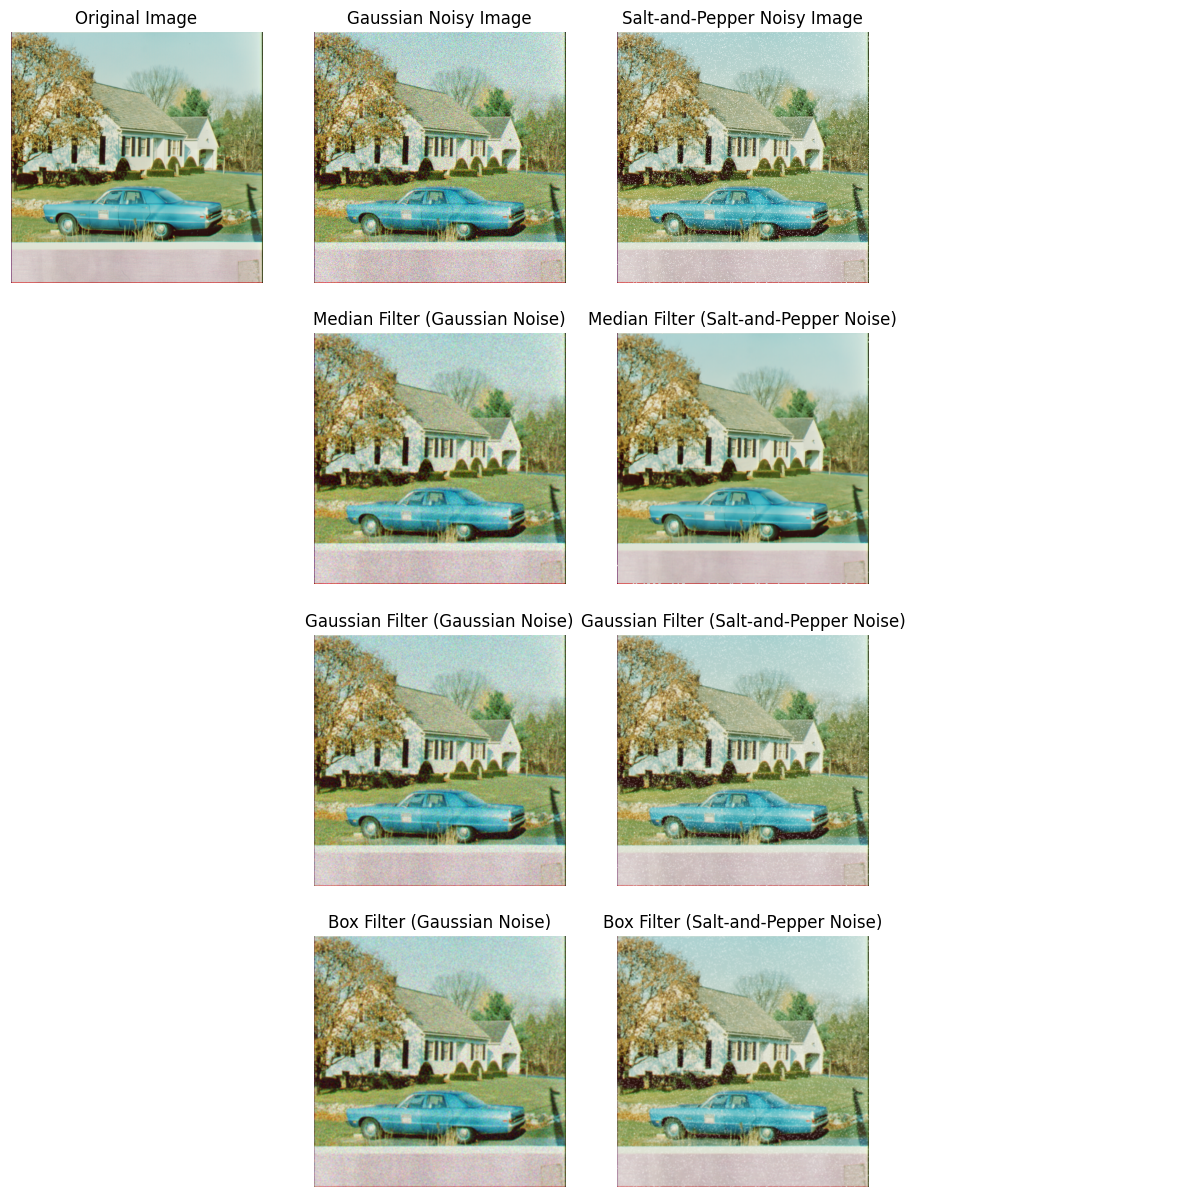

In [9]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('house.tiff')

gaussian_noise = np.random.normal(0, 25, image.shape)
gaussian_noisy_image = image + gaussian_noise
gaussian_noisy_image = np.clip(gaussian_noisy_image, 0, 255).astype(np.uint8)

salt_and_pepper_noise = np.zeros(image.shape, dtype=np.uint8)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if np.random.uniform(0, 1) < 0.05:
            salt_and_pepper_noise[i, j] = 255
        elif np.random.uniform(0, 1) < 0.05:
            salt_and_pepper_noise[i, j] = 0
salt_and_pepper_noisy_image = cv2.add(image, salt_and_pepper_noise)

median_gaussian = cv2.medianBlur(gaussian_noisy_image, 3)
median_salt_and_pepper = cv2.medianBlur(salt_and_pepper_noisy_image, 3)


gaussian_gaussian = cv2.GaussianBlur(gaussian_noisy_image, (3, 3), 0)
gaussian_salt_and_pepper = cv2.GaussianBlur(salt_and_pepper_noisy_image, (3, 3), 0)

box_gaussian = cv2.blur(gaussian_noisy_image, (3, 3))
box_salt_and_pepper = cv2.blur(salt_and_pepper_noisy_image, (3, 3))
fig, ax = plt.subplots(4, 4, figsize=(15, 15))

ax[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(cv2.cvtColor(gaussian_noisy_image, cv2.COLOR_BGR2RGB))
ax[0, 1].set_title("Gaussian Noisy Image")
ax[0, 1].axis('off')

ax[0, 2].imshow(cv2.cvtColor(salt_and_pepper_noisy_image, cv2.COLOR_BGR2RGB))
ax[0, 2].set_title("Salt-and-Pepper Noisy Image")
ax[0, 2].axis('off')

ax[0, 3].axis('off')

ax[1, 0].axis('off')
ax[1, 1].imshow(cv2.cvtColor(median_gaussian, cv2.COLOR_BGR2RGB))
ax[1, 1].set_title("Median Filter (Gaussian Noise)")
ax[1, 1].axis('off')

ax[1, 2].imshow(cv2.cvtColor(median_salt_and_pepper, cv2.COLOR_BGR2RGB))
ax[1, 2].set_title("Median Filter (Salt-and-Pepper Noise)")
ax[1, 2].axis('off')

ax[1, 3].axis('off')

ax[2, 0].axis('off')
ax[2, 1].imshow(cv2.cvtColor(gaussian_gaussian, cv2.COLOR_BGR2RGB))
ax[2, 1].set_title("Gaussian Filter (Gaussian Noise)")
ax[2, 1].axis('off')

ax[2, 2].imshow(cv2.cvtColor(gaussian_salt_and_pepper, cv2.COLOR_BGR2RGB))
ax[2, 2].set_title("Gaussian Filter (Salt-and-Pepper Noise)")
ax[2, 2].axis('off')

ax[2, 3].axis('off')

ax[3, 0].axis('off')
ax[3, 1].imshow(cv2.cvtColor(box_gaussian, cv2.COLOR_BGR2RGB))
ax[3, 1].set_title("Box Filter (Gaussian Noise)")
ax[3, 1].axis('off')

ax[3, 2].imshow(cv2.cvtColor(box_salt_and_pepper, cv2.COLOR_BGR2RGB))
ax[3, 2].set_title("Box Filter (Salt-and-Pepper Noise)")
ax[3, 2].axis('off')

ax[3, 3].axis('off')

plt.show()



**Exercise 5: Highpass Filtering for Image Sharpening**
Implement the Laplacian filter using cv2.Laplacian() to sharpen an image. Show how highpass filters emphasize edges by subtracting a blurred version of the image from the original image.


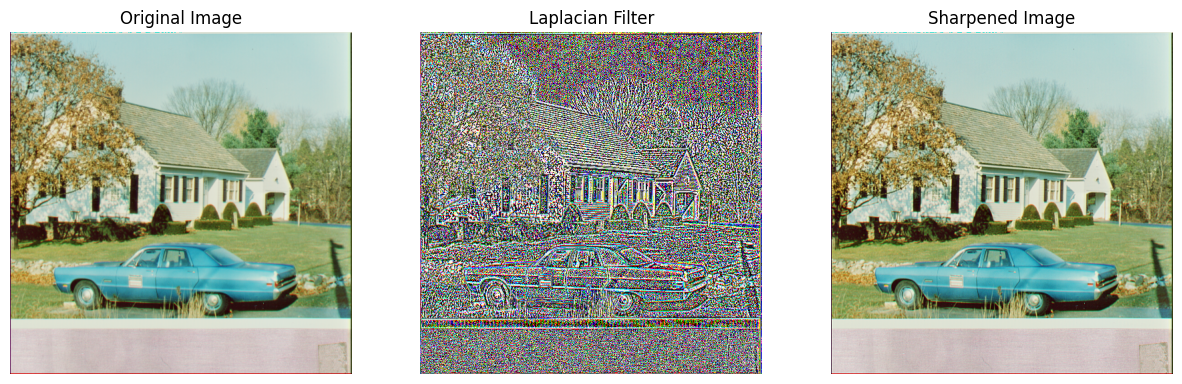

In [10]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('house.tiff')

laplacian = cv2.Laplacian(image, cv2.CV_64F)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(laplacian.astype(np.uint8), cv2.COLOR_BGR2RGB))
ax[1].set_title("Laplacian Filter")
ax[1].axis('off')

ax[2].imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
ax[2].set_title("Sharpened Image")
ax[2].axis('off')

plt.show()


**Exercise 5: Highpass Filtering with Different Kernels**
Create custom highpass filters like the following:
Kernel 1:      Kernel 2:
0 -1  0       -1 -1 -1
-1  5 -1      -1  9 -1
0 -1  0       -1 -1 -1
Apply these kernels to an image using OpenCV’s cv2.filter2D() and observe how different kernels sharpen the image differently.
Then Apply these kernels to various images and explain how the sharpening changes based on the image content.

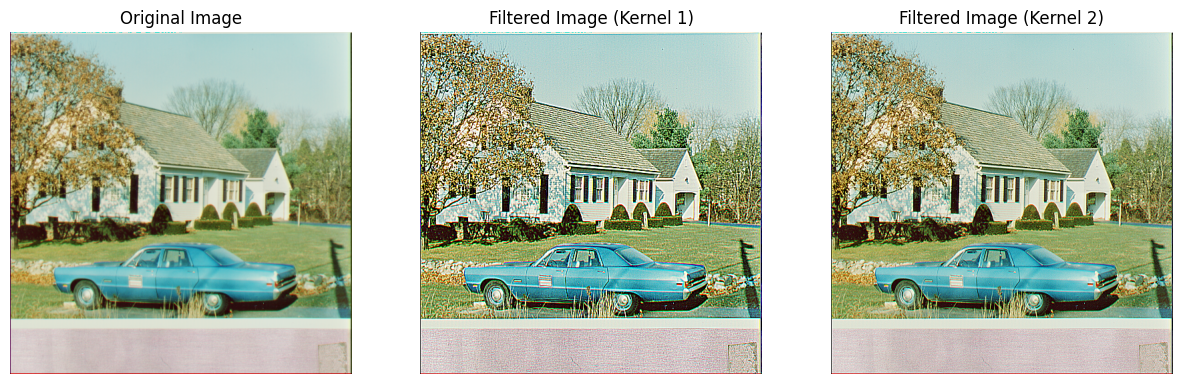

In [12]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('house.tiff')

kernel1 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
kernel2 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

filtered_image1 = cv2.filter2D(image, -1, kernel1)
filtered_image2 = cv2.filter2D(image, -1, kernel2)

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(filtered_image1, cv2.COLOR_BGR2RGB))
ax[1].set_title("Filtered Image (Kernel 1)")
ax[1].axis('off')

ax[2].imshow(cv2.cvtColor(filtered_image2, cv2.COLOR_BGR2RGB))
ax[2].set_title("Filtered Image (Kernel 2)")
ax[2].axis('off')

plt.show()

**Exercise: Region-Based Smoothing using Thresholding**
Apply selective smoothing to an image based on region thresholds using cv2.threshold().

Syntax: retval, mask = cv2.threshold(src, thresh, maxval, type)

    * src: The source image (grayscale)
    * thresh: The threshold value.
    * maxval: The maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV types.
    * type: The type of thresholding to apply (e.g.,THRESH_BINARY, THRESH_BINARY_INV, THRESH_TRUNC, etc.).


Use a smoothing filter only on certain regions of an image that meet a threshold criterion (e.g., smooth all pixels with intensity less than 100). This could be useful for applications like background blurring. use the following code and experiment with different threshold values and observe results

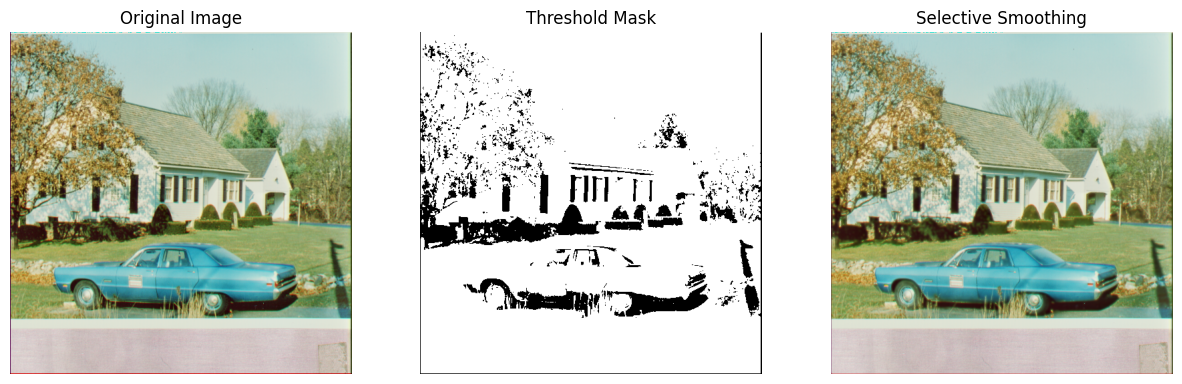

In [15]:
import cv2
import numpy as np

import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('house.tiff')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

retval, mask = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY)
smoothed_image = cv2.GaussianBlur(image, (5, 5), 0)

result_image = image.copy()

result_image[mask == 0] = smoothed_image[mask == 0]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(mask, cmap='gray')
ax[1].set_title("Threshold Mask")
ax[1].axis('off')

ax[2].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
ax[2].set_title("Selective Smoothing")
ax[2].axis('off')

plt.show()
